In [11]:
from diffusers import DDIMScheduler, StableDiffusionInpaintPipeline
import PIL
from PIL import Image
import torch
from torch import autocast
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

(-0.5, 511.5, 511.5, -0.5)

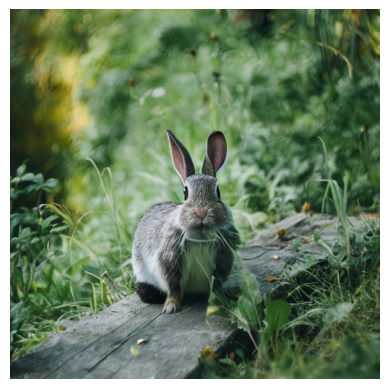

In [6]:
original = PIL.Image.open("rabbit.png")
plt.imshow(original)
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

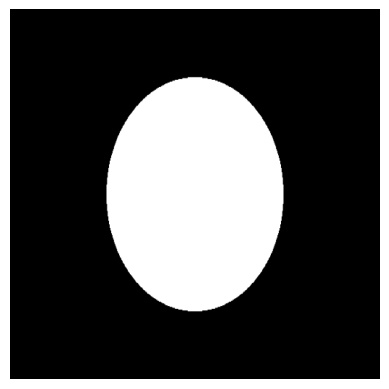

In [10]:
mask = PIL.Image.open("rabbit-mask.png")
plt.imshow(mask)
plt.axis('off')

In [12]:
model = StableDiffusionInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype = torch.float16
)
model = model.to("cuda")


text_encoder\model.safetensors not found


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [18]:
generator = torch.Generator("cuda").manual_seed(33)
output = model(prompt = '''
    A dog sitting on a plank of wood in a grassy field,
    high resolution, photograph, photorealistic 
  '''
  ,image = original
  ,mask_image = mask
  ,generator=generator               
)
output_image = output.images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

(-0.5, 511.5, 511.5, -0.5)

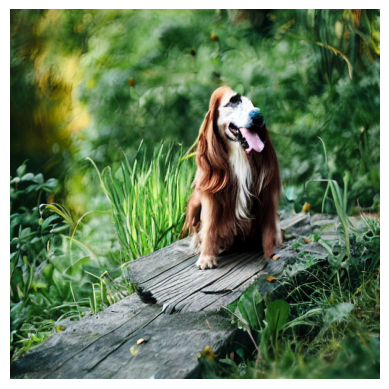

In [21]:
plt.imshow(output_image)
plt.axis('off')